In [1]:
from scopeV2.datasets.geneva_stroke_outcome_dataset import GenevaStrokeOutcomeDataset
from scopeV2.datasets.leftright_dataset import LeftRightDataset
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_slices(num_rows, num_columns, width, height, data):
    """Plot a montage of 20 CT slices"""
    data = np.rot90(np.array(data))
    data = np.transpose(data)
    data = np.reshape(data, (num_rows, num_columns, width, height))
    rows_data, columns_data = data.shape[0], data.shape[1]
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]
    fig_width = 12.0
    fig_height = fig_width * sum(heights) / sum(widths)
    f, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={"height_ratios": heights},
    )
    for i in range(rows_data):
        for j in range(columns_data):
            axarr[i, j].imshow(data[i][j], cmap="gray")
            axarr[i, j].axis("off")
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()

In [3]:
# image_dataset_path = '/Users/jk1/stroke_research/SimpleVoxel-3D/leftright/data.npy'
# label_path = '/Users/jk1/stroke_research/SimpleVoxel-3D/leftright/labels.csv'
# ds = LeftRightDataset(image_dataset_path, label_path, validation_size=0, neg_to_pos_ratio=2)

In [18]:
image_dataset_path = '/Users/jk1/temp/scope_test/subset5_noGT_pmaps_15-19_dataset_with_combined_mRS_90_days.npz'
# image_dataset_path = '/Users/jk1/stroke_datasets/dataset_files/perfusion_data_sets/noGT_datasets/train_noGT_pmaps_15-19_dataset_with_combined_mRS_90_days.npz'
label_path = '/Users/jk1/temp/scope_test/joined_anon_outcomes_2015_2016_2017_2018_df.xlsx'
outcome = 'combined_mRS_0-2_90_days'
ds = GenevaStrokeOutcomeDataset(image_dataset_path, label_path, outcome, validation_size=0, neg_to_pos_ratio=1)


Using channels: ['wcoreg_Tmax', 'wcoreg_CBF', 'wcoreg_MTT', 'wcoreg_CBV']


In [19]:
ds.__len__()

4

In [20]:
sample = ds[0]
image = sample[0].numpy()
c, w, h, d = image.shape
image.shape

(4, 46, 46, 46)

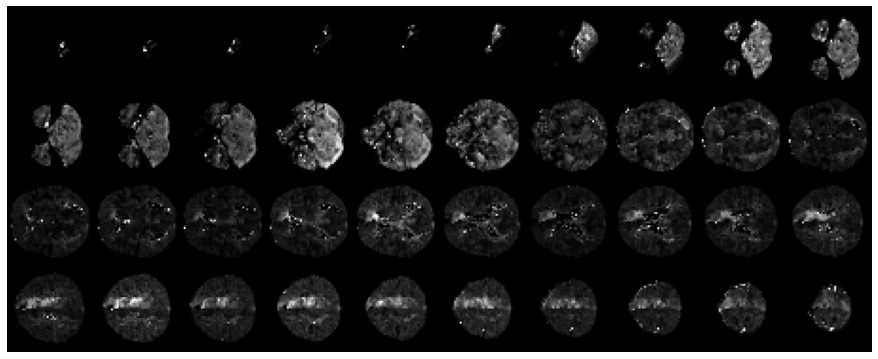

In [21]:
plot_slices(4,10, w,h, image[0, :,:,:40])


Testing balancing of dataset class

In [22]:
labels = [ds[idx][1][0] for idx in range(ds.__len__())]
sum(labels)/ds.__len__()

tensor(0.5000)

Testing data augmentation


In [25]:
augmentation_dict = {}
augmentation_dict['flip'] = True

# ds = LeftRightDataset(image_dataset_path, label_path, validation_size=0, neg_to_pos_ratio=1,
#                       augmentation_dict=augmentation_dict)
ds = GenevaStrokeOutcomeDataset(image_dataset_path, label_path, outcome, validation_size=0, neg_to_pos_ratio=1,
                      augmentation_dict=augmentation_dict)

Using channels: ['wcoreg_Tmax', 'wcoreg_CBF', 'wcoreg_MTT', 'wcoreg_CBV']


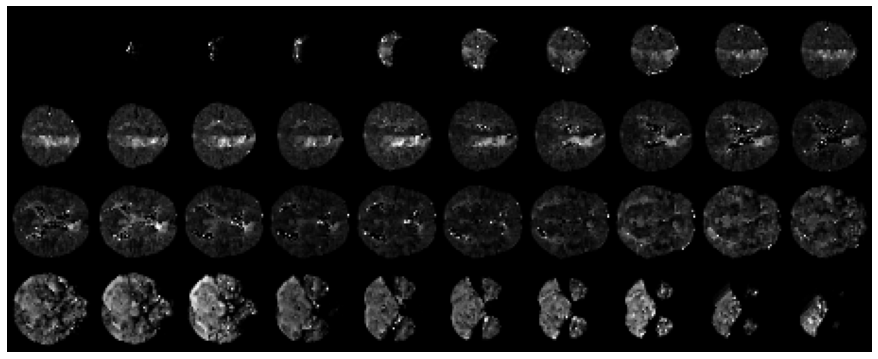

In [27]:
sample = ds[0]
image = sample[0].numpy()
c, w, h, d = image.shape
plot_slices(4,10, w,h, image[0, :,:,:40])

In [51]:
augmentation_dict = {}
augmentation_dict['offset'] = 0.4

# ds = LeftRightDataset(image_dataset_path, label_path, validation_size=0, neg_to_pos_ratio=1,
#                       augmentation_dict=augmentation_dict)
ds = GenevaStrokeOutcomeDataset(image_dataset_path, label_path, outcome, validation_size=0, neg_to_pos_ratio=1,
                      augmentation_dict=augmentation_dict)

Using channels: ['wcoreg_Tmax', 'wcoreg_CBF', 'wcoreg_MTT', 'wcoreg_CBV']


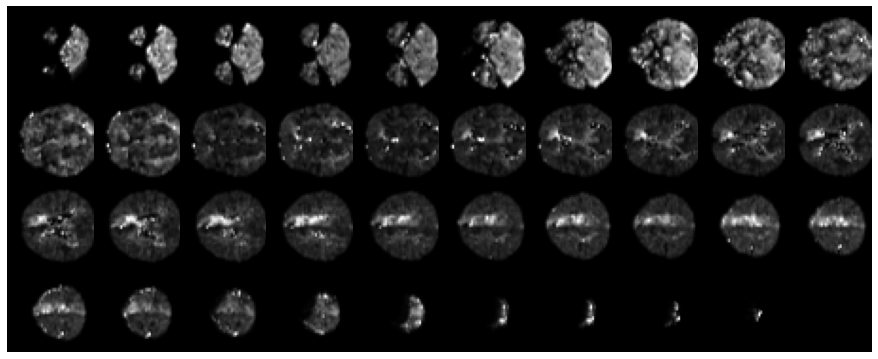

In [52]:
sample = ds[0]
image = sample[0].numpy()
c, w, h, d = image.shape
plot_slices(4,10, w,h, image[0, :,:,:40])


In [53]:
augmentation_dict = {}
augmentation_dict['scale'] = 0.2

# ds = LeftRightDataset(image_dataset_path, label_path, validation_size=0, neg_to_pos_ratio=1,
#                       augmentation_dict=augmentation_dict)
ds = GenevaStrokeOutcomeDataset(image_dataset_path, label_path, outcome, validation_size=0, neg_to_pos_ratio=1,
                      augmentation_dict=augmentation_dict)

Using channels: ['wcoreg_Tmax', 'wcoreg_CBF', 'wcoreg_MTT', 'wcoreg_CBV']


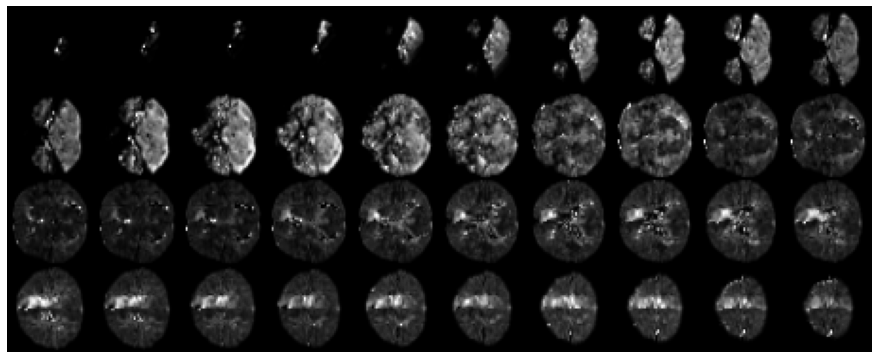

In [55]:
sample = ds[0]
image = sample[0].numpy()
c, w, h, d = image.shape
plot_slices(4,10, w,h, image[0, :,:,:40])

In [56]:

augmentation_dict = {}
augmentation_dict['rotate'] = True

# ds = LeftRightDataset(image_dataset_path, label_path, validation_size=0, neg_to_pos_ratio=1,
#                       augmentation_dict=augmentation_dict)
ds = GenevaStrokeOutcomeDataset(image_dataset_path, label_path, outcome, validation_size=0, neg_to_pos_ratio=1,
                      augmentation_dict=augmentation_dict)

Using channels: ['wcoreg_Tmax', 'wcoreg_CBF', 'wcoreg_MTT', 'wcoreg_CBV']


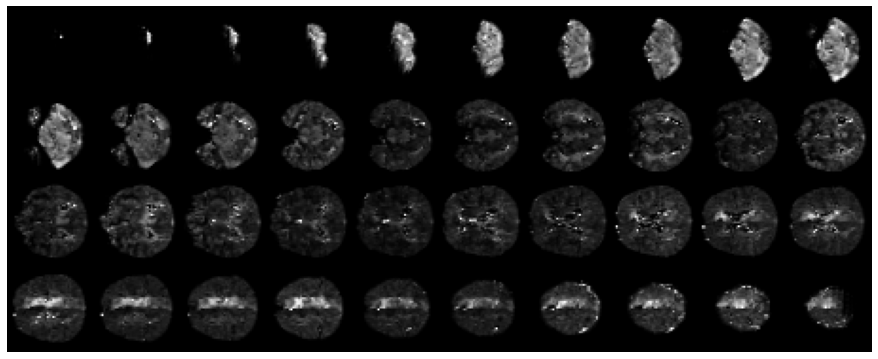

In [58]:
sample = ds[0]
image = sample[0].numpy()
c, w, h, d = image.shape
plot_slices(4,10, w,h, image[0, :,:,:40])

In [34]:
augmentation_dict = {}
augmentation_dict['noise'] = 0.25

# ds = LeftRightDataset(image_dataset_path, label_path, validation_size=0, neg_to_pos_ratio=1,
#                       augmentation_dict=augmentation_dict)
ds = GenevaStrokeOutcomeDataset(image_dataset_path, label_path, outcome, validation_size=0, neg_to_pos_ratio=1,
                      augmentation_dict=augmentation_dict)

Using channels: ['wcoreg_Tmax', 'wcoreg_CBF', 'wcoreg_MTT', 'wcoreg_CBV']


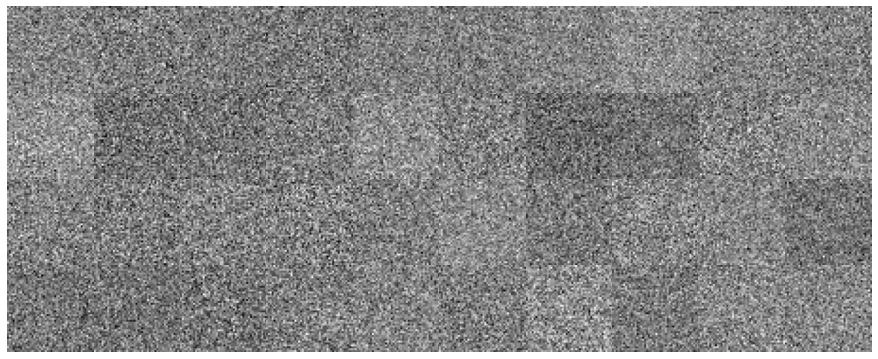

In [35]:
sample = ds[0]
image = sample[0].numpy()
c, w, h, d = image.shape
plot_slices(4,10, w,h, image[0, :,:,:40])